## Problem Statement

Identify the channel-wise top 5 best-selling articles.

Determine the peak order-placing time.

Create a visual representation of orders on a regional basis over the given period.

Identify the lowest-selling item over the period.

Calculate the average number of items placed in a single order.

Analyze the size ratio of articles/categories sold and derive the ideal size ratio we should produce to match market demand.

Provide any additional insights based on your analysis.

## Solutions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('ComicSense DA Assignment Data.xlsx')

In [3]:
df

,Order Code,Shipping Address City,Shipping Address State,Shipping Address Pincode,Item SKU Code,Channel Name,Order Date as dd/mm/yyyy hh:MM:ss
0,14799,Bhubaneswar,Odisha,751024,TEE050__LK_L,Platform 5,2022-01-27 10:58:10
1,705423,Bangalore,Karnataka,560093,TEE358___H_M,Platform 1,2022-01-31 23:46:01
2,18083,New Delhi,Delhi,110075,TEE352__H_XL,Platform 2,2022-01-31 23:58:05
3,705599,CHENNAI,Tamil Nadu,600063,TPS016___REG,Platform 3,2022-02-01 00:07:37
4,6924085,DELHI,Delhi,110029,TEE150__H_XL,Platform 3,2022-02-01 00:08:08
...,...,...,...,...,...,...,...
4900,709419,JAMMU & KASHMIR,Jammu & Kashmir,191111,TEE148__H_XL,Platform 3,2022-02-28 23:28:59
4901,709769,New Delhi,Delhi,110053,TPS016__ARGE,Platform 5,2022-02-28 23:30:05
4902,709247,KARNATAKA,Karnataka,572201,HOOD034_K_XL,Platform 3,2022-02-28 23:35:19
4903,709421,KARNATAKA,Karnataka,560076,BMBJKT0_HT_L,Platform 3,2022-02-28 23:36:01


In [4]:
df.shape

(4905, 7)

In [26]:
df.columns

Index(['Order Code', 'Shipping Address City', 'Shipping Address State',
       'Shipping Address Pincode', 'Item SKU Code', 'Channel Name',
       'Order Date as dd/mm/yyyy hh:MM:ss', 'Order Date', 'Hour', 'Size'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905 entries, 0 to 4904
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Order Code                         4905 non-null   int64         
 1   Shipping Address City              4905 non-null   object        
 2   Shipping Address State             4905 non-null   object        
 3   Shipping Address Pincode           4905 non-null   int64         
 4   Item SKU Code                      4905 non-null   object        
 5   Channel Name                       4905 non-null   object        
 6   Order Date as dd/mm/yyyy hh:MM:ss  4905 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 268.4+ KB


In [9]:
pd.isnull(df).sum()

Order Code                           0
Shipping Address City                0
Shipping Address State               0
Shipping Address Pincode             0
Item SKU Code                        0
Channel Name                         0
Order Date as dd/mm/yyyy hh:MM:ss    0
dtype: int64

In [10]:
# convert order date to datetime

df["Order Date"] = pd.to_datetime(df["Order Date as dd/mm/yyyy hh:MM:ss"])

In [12]:
df["Order Date"]

0      2022-01-27 10:58:10
1      2022-01-31 23:46:01
2      2022-01-31 23:58:05
3      2022-02-01 00:07:37
4      2022-02-01 00:08:08
               ...        
4900   2022-02-28 23:28:59
4901   2022-02-28 23:30:05
4902   2022-02-28 23:35:19
4903   2022-02-28 23:36:01
4904   2022-02-28 23:43:21
Name: Order Date, Length: 4905, dtype: datetime64[ns]

## 1. Identify the channel-wise top 5 best-selling articles

In [13]:
channel_top5 = df.groupby(["Channel Name", "Item SKU Code"]).size()
channel_top5 = channel_top5.reset_index(name="Count")
channel_top5 = channel_top5.sort_values(by=["Channel Name", "Count"], ascending=[True, False])
channel_top5 = channel_top5.groupby("Channel Name").head(5)
print("Channel-wise Top 5 Best-Selling Articles:\n", channel_top5)

Channel-wise Top 5 Best-Selling Articles:
      Channel Name Item SKU Code  Count
445    Platform 1  TPS014___REG     71
452    Platform 1  TPS017___REG     53
7      Platform 1  BMBJKT0_LK_L     44
8      Platform 1  BMBJKT0_LK_M     43
444    Platform 1  TPS014__LE_L     43
535    Platform 2  TEE352__H_XL     10
515    Platform 2  TEE302___H_M      6
518    Platform 2  TEE311__L_XL      6
536    Platform 2  TEE352___H_L      6
524    Platform 2  TEE322__SL_L      5
554    Platform 3  BMBJKT0_HT_M     30
824    Platform 3  TEE367___H_L     24
553    Platform 3  BMBJKT0_HT_L     23
559    Platform 3  BMBJKT0_LK_M     22
695    Platform 3  TEE148___H_M     21
929    Platform 4  JOGR003_LK_L     16
931    Platform 4  JOGR004_K_XL     14
932    Platform 4  JOGR004_LK_L     14
933    Platform 4  JOGR004_LK_M     13
934    Platform 4  JOGR005_K_XL     12
1283   Platform 5  TEE367__H_XL     11
1179   Platform 5  BMBJKT0__XXL      8
1284   Platform 5  TEE367___H_L      7
1209   Platform 5  JO

## 2. Determine the peak order-placing time.

In [14]:
df['Hour'] = df["Order Date"].dt.hour
peak_hour = df['Hour'].value_counts().idxmax()
print("Peak Order Placing Time:", peak_hour, "hrs")

Peak Order Placing Time: 22 hrs


## 3. Create a visual representation of orders on a regional basis over the given period.

In [31]:
top_state = df['Shipping Address State'].value_counts()
top_state

Maharashtra                                 692
Karnataka                                   652
Uttar Pradesh                               421
Tamil Nadu                                  343
Delhi                                       316
Rajasthan                                   314
Telangana                                   261
West Bengal                                 200
Haryana                                     173
Kerala                                      147
Assam                                       141
Uttarakhand                                 126
Punjab                                      121
Gujarat                                     119
Madhya Pradesh                              118
Andhra Pradesh                              103
Odisha                                       77
Arunachal Pradesh                            74
Bihar                                        70
Himachal Pradesh                             65
Jharkhand                               

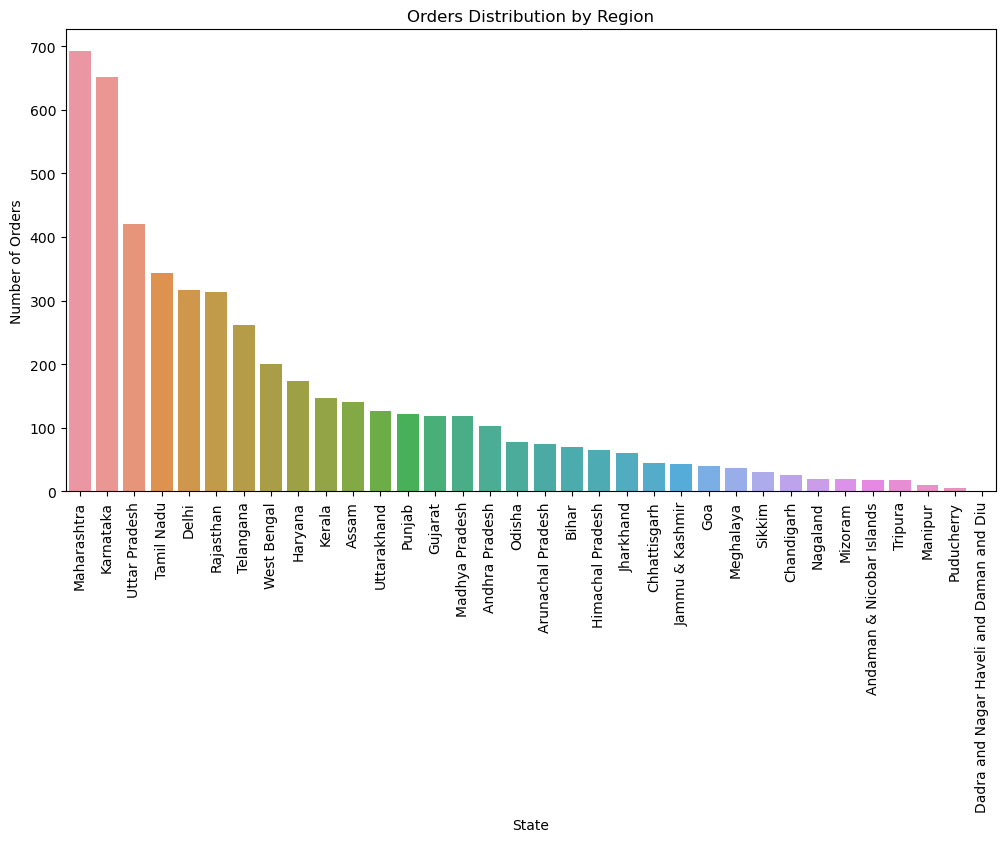

In [15]:
region_orders = df["Shipping Address State"].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=region_orders.index, y=region_orders.values)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.title("Orders Distribution by Region")
plt.show()

## 4. Identify the lowest-selling item over the period.

In [16]:
lowest_selling = df["Item SKU Code"].value_counts().idxmin()
print("Lowest Selling Item:", lowest_selling)

Lowest Selling Item: TEE193___XXL


## 5. Calculate the average number of items placed in a single order.

In [17]:
average_items_per_order = df.groupby("Order Code").size().mean()
print("Average Items Per Order:", round(average_items_per_order, 2))

Average Items Per Order: 1.53


## 6. Analyze the size ratio of articles/categories sold and derive the ideal size ratio we should produce to match market demand.

In [18]:
df['Size'] = df["Item SKU Code"].str.extract(r'(_[SMLXL]+)')
size_distribution = df["Size"].value_counts(normalize=True)
print("Size Distribution:")
print(size_distribution)

Size Distribution:
_L       0.404725
_XL      0.194658
_M       0.193374
_S       0.112481
_XXL     0.077042
_LL      0.007704
_SL      0.005907
_MS      0.001798
_XS      0.000770
_XXXL    0.000770
_X       0.000514
_XXS     0.000257
Name: Size, dtype: float64


## 7. Provide any additional insights based on your analysis. 

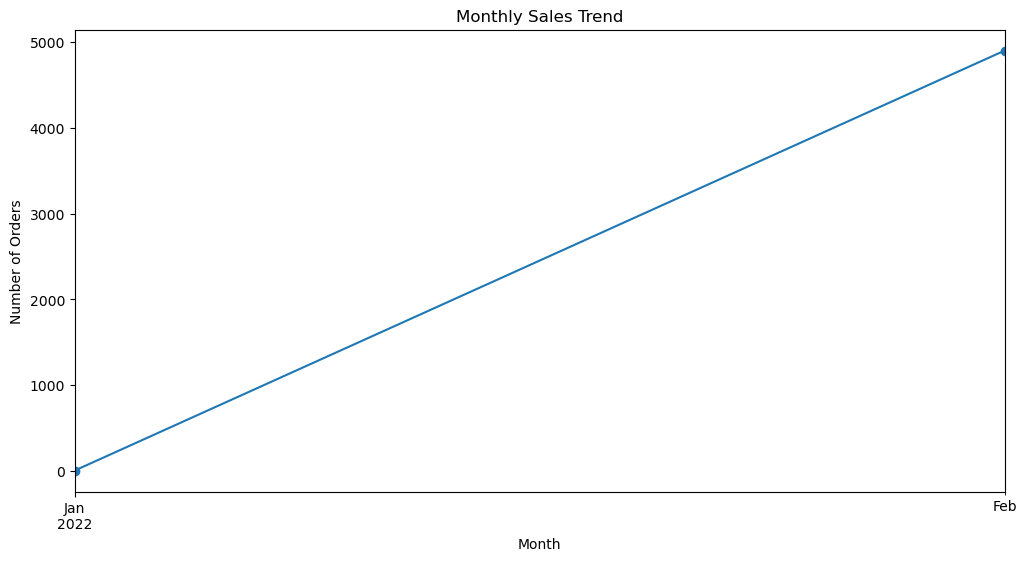

In [19]:
monthly_orders = df.groupby(df["Order Date"].dt.to_period("M")).size()
plt.figure(figsize=(12, 6))
monthly_orders.plot(marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Monthly Sales Trend")
plt.show()

## Order by Platform

In [20]:
platform_counts = df['Channel Name'].value_counts()
print("\nAdditional Insight - Orders by Platform:")
print(platform_counts)


Additional Insight - Orders by Platform:
Platform 1    2563
Platform 3    1250
Platform 4     668
Platform 5     273
Platform 2     151
Name: Channel Name, dtype: int64


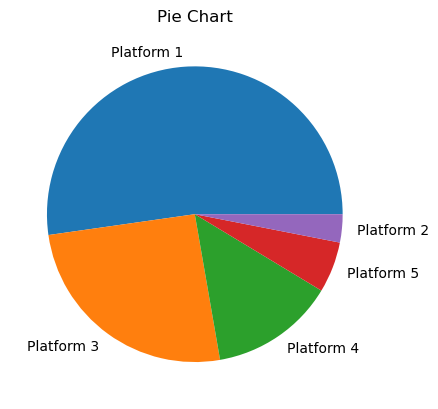

In [39]:
plt.pie(platform_counts, labels = platform_counts.index)
plt.title('Pie Chart')
plt.show()

## Conclusion

1. The top 5 Channel wise best selling articels are mentioned on the above
2. The Peak Order Placing Time: 22 hrs, i.e, 10 PM 
3. Top 5 regions where we will deliver maximum Products are : Maharashtra, Karnataka, Uttar Pradesh,Tamil Nadu and Delhi
4. The Lowest selling item over the period is : TEE193___XXL
5. The average number of items placed in a single order is 1.53 i.e, 1 or 2
6. The ideal size ratio we should produce to match market demand is : L size
7. There is around 4800 orders are placed between the January to February month
8. In Platform no. 1 there is maximum number of orders occur